In [1]:
import pandas as pd
import glob

import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

# Analyse Benchmark Results on Digit Benchmark

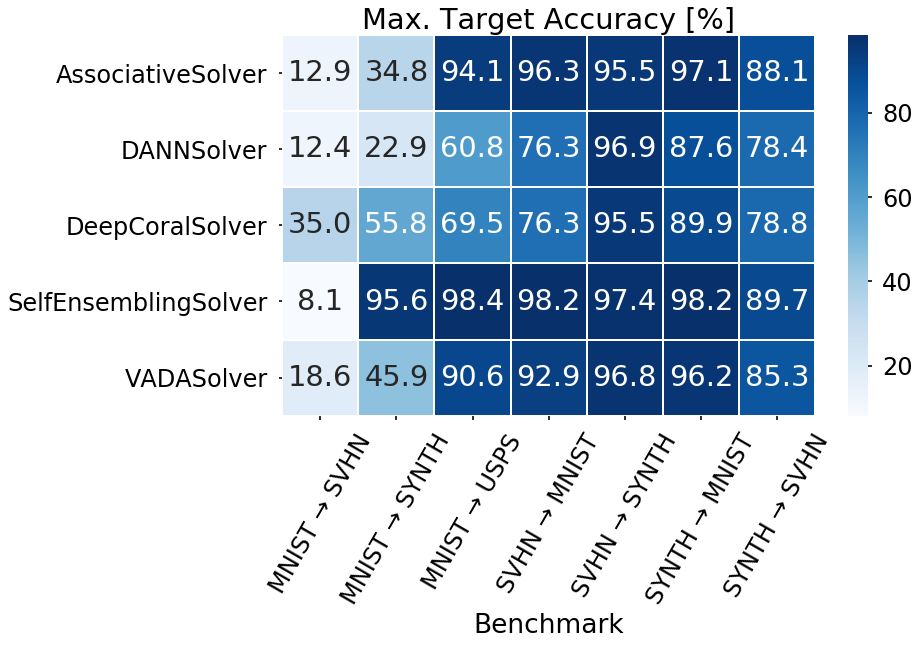

In [35]:
class DigitResults(object):
    
    search_pattern = 'log/*-*/*/losshistory.csv'

    def __init__(self, fname):
        
        self.fname = fname
        self.load()
        
    def load(self):
        
        if os.path.exists(self.fname):
            stats = pd.read_csv(self.fname, index_col = 0)
        else:
            self.df = self.read_digit_benchmark()
    
    def read_digit_benchmark(self):

        entries = []

        for fname in glob.glob(self.search_pattern):    
            df = pd.read_csv(fname, index_col=0)

            if 'nullspace' in fname:
                continue
            if 'noise' in fname:
                continue

            if len(df) > 100:

                print(fname)

                matches, = re.findall(r'.*-([a-z]*)-([a-z]*)/[0-9-_]*(.*)/.*', fname)
                source, target, solver = matches

                entries.append({
                    'fname'  : fname,
                    'name'   : solver,
                    'source' : source,
                    'target' : target,
                    'acc_s'  : df.acc_s.values[-10:].mean(),
                    'acc_t'  : df.acc_t.values[-10:].mean(),
                    'aulc_s' : df.acc_s.values.sum(),
                    'aulc_t' : df.acc_t.values.sum()
                })

        stats = pd.DataFrame(entries)

        stats['adapt'] = stats.source.apply(lambda x : x.upper()) + ' → ' + stats.target.apply(lambda x : x.upper())
        stats['key'] = stats.source + stats.target + stats.name
        
        self.stats = stats

    def gen_cfm(self):

        mmax = stats.groupby(['name', 'source', 'target', 'adapt']).max().reset_index()
        std  = stats.groupby(['name', 'source', 'target', 'adapt']).std().reset_index()

        newf = mmax[['name', 'adapt', 'acc_t']].pivot(index='name', columns='adapt')
        newf.columns = newf.columns.droplevel(0)

        self.cfm = newf
        
    def plot(self):
        #sns.set_context('poster')
        plt.figure(figsize=(12,7))
        sns.heatmap(data=100*newf, cmap = 'Blues', annot = True, fmt='.1f', square=True, linewidths=1)

        plt.xlabel('Benchmark')
        plt.xticks(rotation=60)
        plt.ylabel('')
        plt.title("Max. Target Accuracy [%]")
    
import os

fname = 'results/180926-digit-benchmark-results.csv'

sns.set_context('poster', font_scale=1.5)
results = DigitResults(fname)
results.plot()
plt.savefig('/home/stes/code/salad-paper/benchmark-digits.pdf', bbox_inches='tight')
plt.show()

In [147]:
entries = []

for fname in glob.glob('log/noise-*/*/losshistory.csv'):    
    df = pd.read_csv(fname, index_col=0)
    
    if len(df) > 100:
        
        print(fname)
        
        matches, = re.findall(r'.*-([a-z]*)-([a-z]*)/[0-9-_]*(.*)/.*', fname)
        source, target, solver = matches
        
        entries.append({
            'fname'  : fname,
            'name'   : solver,
            'source' : source,
            'acc_s'  : df.acc_s.values[-100:].mean(),
            'acc_t'  : df.acc_t.values[-100:].mean(),
            'aulc_s' : df.acc_s.values.sum(),
            'aulc_t' : df.acc_t.values.sum()
        })

stats = pd.DataFrame(entries)

stats['adapt'] = 'noisy ' + stats.source.apply(lambda x : x.upper())
stats['key'] = stats.source + stats.name

# stats.to_csv('results/180926-noise-benchmark-results.csv')

log/noise-svhn-mnist/20180926-150522_SelfEnsemblingSolver/losshistory.csv
log/noise-svhn-mnist/20180926-205216_DANNSolver/losshistory.csv
log/noise-svhn-mnist/20180926-160053_VADASolver/losshistory.csv
log/noise-svhn-mnist/20180926-212351_DeepCoralSolver/losshistory.csv
log/noise-svhn-mnist/20180926-210537_AssociativeSolver/losshistory.csv
log/noise-svhn-mnist/20180926-115734_SelfEnsemblingSolver/losshistory.csv
log/noise-synth-mnist/20180926-231558_SelfEnsemblingSolver/losshistory.csv
log/noise-synth-mnist/20180926-210625_AssociativeSolver/losshistory.csv
log/noise-synth-mnist/20180926-200821_DeepCoralSolver/losshistory.csv
log/noise-synth-mnist/20180926-115933_VADASolver/losshistory.csv
log/noise-synth-mnist/20180926-170243_DANNSolver/losshistory.csv


In [10]:
stats = pd.read_csv('results/180926-noise-benchmark-results.csv')

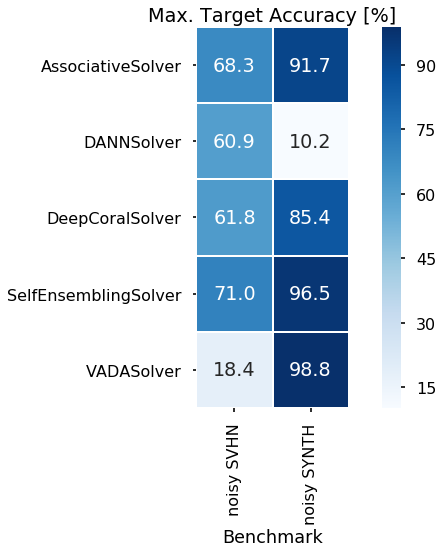

In [11]:
mmax = stats.groupby(['name', 'source', 'adapt']).max().reset_index()
std  = stats.groupby(['name', 'source', 'adapt']).std().reset_index()

newf = mmax[['name', 'adapt', 'acc_t']].pivot(index='name', columns='adapt')
newf.columns = newf.columns.droplevel(0)

sns.set_context('poster')
plt.figure(figsize=(12,7))
sns.heatmap(data=100*newf, cmap = 'Blues', annot = True, fmt='.1f', square=True, linewidths=1)

plt.xlabel('Benchmark')
plt.ylabel('')
plt.title("Max. Target Accuracy [%]")
#plt.savefig('../docs/img/benchmarks.svg', bbox_inches='tight')
plt.show()

In [156]:
entries = []

for fname in glob.glob('log/nullspace-*/*/losshistory.csv'):    
    df = pd.read_csv(fname, index_col=0)
    
    if len(df) > 10:
        
        print(fname)
        
        matches, = re.findall(r'.*-([a-z]*)-([a-z]*)/[0-9-_]*(.*)/.*', fname)
        source, target, solver = matches
        
        entries.append({
            'fname'  : fname,
            'name'   : solver,
            'source' : source,
            'target' : target,
            'acc_s'  : df.acc_s.values[-1000:].mean(),
            'acc_t'  : df.acc_t.values[-1000:].mean(),
            'aulc_s' : df.acc_s.values.sum(),
            'aulc_t' : df.acc_t.values.sum()
        })

stats = pd.DataFrame(entries)

stats['adapt'] = stats.source.apply(lambda x : x.upper()) + ' → ' + stats.target.apply(lambda x : x.upper())
stats['key'] = stats.source + stats.target + stats.name

#stats.to_csv('results/180926-digit-benchmark-results.csv')

log/nullspace-synth-mnist/20180926-210507_SelfEnsemblingSolver/losshistory.csv
log/nullspace-mnist-usps/20180926-155058_DeepCoralSolver/losshistory.csv
log/nullspace-mnist-usps/20180926-200502_SelfEnsemblingSolver/losshistory.csv
log/nullspace-mnist-usps/20180926-155420_DeepCoralSolver/losshistory.csv
log/nullspace-mnist-usps/20180926-155250_DeepCoralSolver/losshistory.csv
log/nullspace-mnist-usps/20180926-204352_SelfEnsemblingSolver/losshistory.csv
log/nullspace-svhn-mnist/20180926-153606_DeepCoralSolver/losshistory.csv
log/nullspace-svhn-mnist/20180926-193234_SelfEnsemblingSolver/losshistory.csv
log/nullspace-svhn-mnist/20180926-193340_SelfEnsemblingSolver/losshistory.csv
log/nullspace-svhn-mnist/20180926-193710_SelfEnsemblingSolver/losshistory.csv
log/nullspace-svhn-mnist/20180926-155520_DeepCoralSolver/losshistory.csv
log/nullspace-synth-svhn/20180926-162612_DeepCoralSolver/losshistory.csv


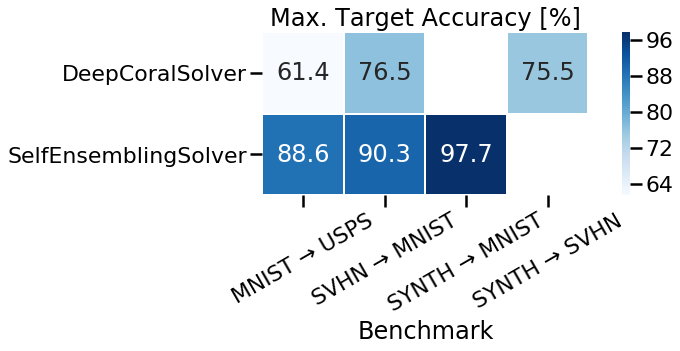

In [157]:
mmax = stats.groupby(['name', 'source', 'target', 'adapt']).max().reset_index()
std  = stats.groupby(['name', 'source', 'target', 'adapt']).std().reset_index()

newf_ = mmax[['name', 'adapt', 'acc_t']].pivot(index='name', columns='adapt')
newf_.columns = newf_.columns.droplevel(0)

sns.set_context('poster')
plt.figure(figsize=(12,3))
sns.heatmap(data=100*newf_, cmap = 'Blues', annot = True, fmt='.1f', square=True, linewidths=1)

plt.xticks(rotation=30)

plt.xlabel('Benchmark')
plt.ylabel('')
plt.title("Max. Target Accuracy [%]")
plt.savefig('../docs/img/benchmarks.svg', bbox_inches='tight')
plt.show()

In [161]:
newf_.index = newf_.index  + '_adapt'

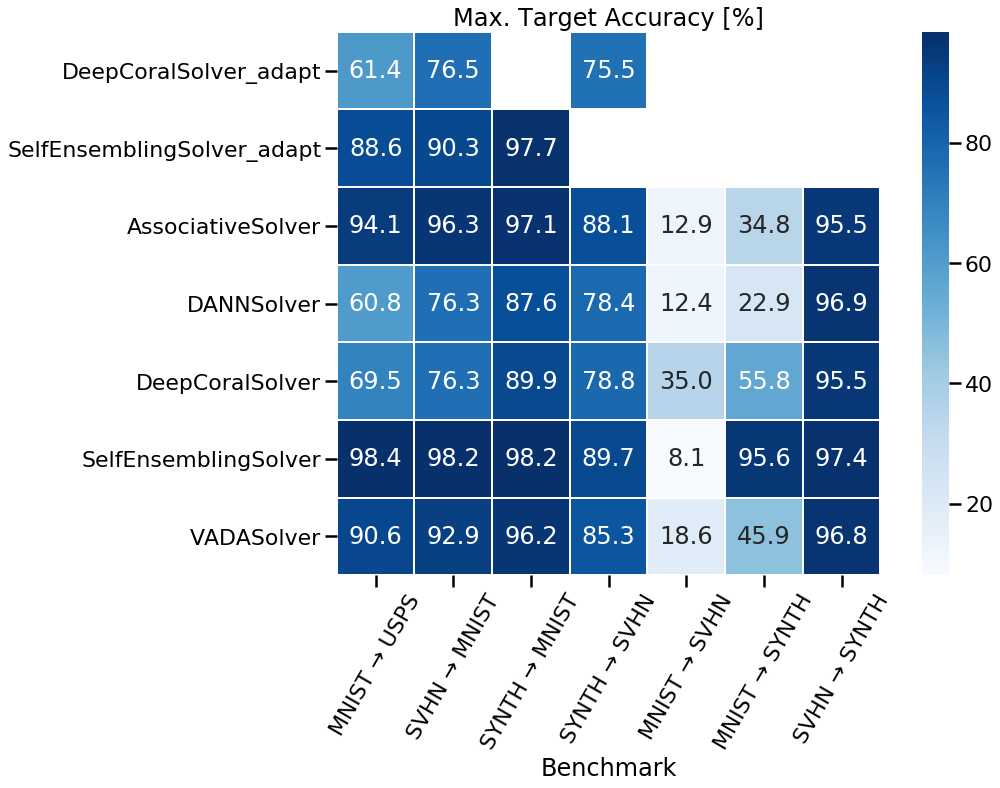

In [170]:
newf_2 = pd.concat([newf_, newf], sort=False)

sns.set_context('poster')
plt.figure(figsize=(15,10))
sns.heatmap(data=100*newf_2, cmap = 'Blues', annot = True, fmt='.1f', square=True, linewidths=1)

plt.xticks(rotation=60)

plt.xlabel('Benchmark')
plt.ylabel('')
plt.title("Max. Target Accuracy [%]")
plt.savefig('../docs/img/benchmarks.svg', bbox_inches='tight')
plt.show()

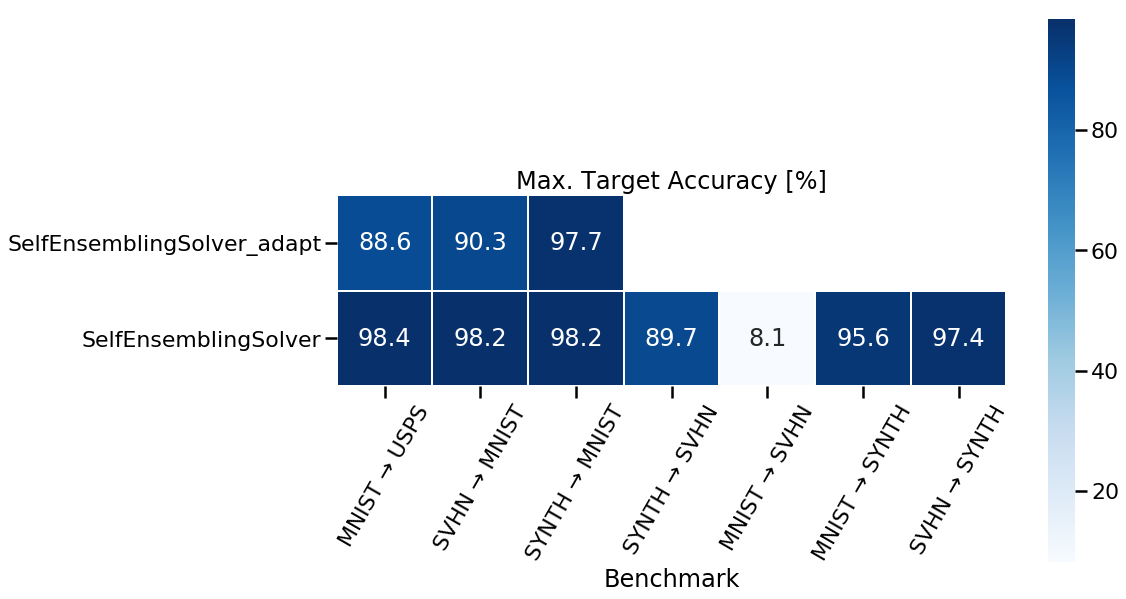

In [172]:
sns.set_context('poster')
plt.figure(figsize=(15,10))
sns.heatmap(data=100*newf_2.loc[ [i for i in newf_2.index if 'Ense' in i] ], cmap = 'Blues', annot = True, fmt='.1f', square=True, linewidths=1)

plt.xticks(rotation=60)

plt.xlabel('Benchmark')
plt.ylabel('')
plt.title("Max. Target Accuracy [%]")
plt.savefig('../docs/img/benchmarks.svg', bbox_inches='tight')
plt.show()